This is the jupyter notebook which will hold our neural networks and be used to create graphs and stuff

In [1]:
import numpy as np
from load import *
all_trials = load_data()
labels = ["X_test",
"y_test",
"person_train_valid",
"X_train_valid",
"y_train_valid",
"person_test"]
print('generating data using all test and all train')
for i, k in enumerate(all_trials):
    print('{}: {} '.format(labels[i], k.shape))
print('generating data using subj 1 test and subj 1 train')
subject_1_trials = load_data_subject_1_train_and_test()
for i, k in enumerate(subject_1_trials):
    print('{}: {} '.format(labels[i], k.shape))
print('generating data using subj 1 test and full train')
subject_1_all_test = load_data_subject_1_test_and_full_train()
for i, k in enumerate(subject_1_all_test):
    print('{}: {} '.format(labels[i], k.shape))

generating data using all test and all train
X_test: (443, 22, 1000) 
y_test: (443,) 
person_train_valid: (2115, 1) 
X_train_valid: (2115, 22, 1000) 
y_train_valid: (2115,) 
person_test: (443, 1) 
generating data using subj 1 test and subj 1 train
X_test: (50, 22, 1000) 
y_test: (50,) 
person_train_valid: (2115, 1) 
X_train_valid: (237, 22, 1000) 
y_train_valid: (237,) 
person_test: (443, 1) 
generating data using subj 1 test and full train
X_test: (50, 22, 1000) 
y_test: (50,) 
person_train_valid: (2115, 1) 
X_train_valid: (2115, 22, 1000) 
y_train_valid: (2115,) 
person_test: (443, 1) 


Also created augmented versions of the datasets

In [2]:
augmented_trials_x = np.concatenate((all_trials[3][:, :, ::2], all_trials[3][:, :, 1::2]), axis=0)
augmented_trials_y = np.concatenate((all_trials[4], all_trials[4]))
augmented_test_x = np.concatenate((all_trials[0][:, :, ::2], all_trials[0][:, :, 1::2]), axis=0)
augmented_test_y = np.concatenate((all_trials[1], all_trials[1]))
print('{}: {} '.format("Augmented x", augmented_trials_x.shape))
print('{}: {} '.format("Augmented y", augmented_trials_y.shape))
print('{}: {} '.format("Aug Test x", augmented_test_x.shape))
print('{}: {} '.format("Aug Test y", augmented_test_y.shape))

Augmented x: (4230, 22, 500) 
Augmented y: (4230,) 
Aug Test x: (886, 22, 500) 
Aug Test y: (886,) 


There are 2115 trials and 1000 timestamps. There are 22 electrodes. There are 443 test trials. There are persons 0-8 (inclusive) and person_train_valid[trial] gives the person that was used in the specific trial. 

train a NN for the first subject

All of these initial CNNs will be done with l2 reg of 0.001, alpha in ELU of .7, learning rate of 0.001 in SGD with nesterov momentum, dropout of 0.5, 200 epochs, and the CNN architecture developed in the paper

1 Physical GPUs, 1 Logical GPUs
Train on 189 samples, validate on 48 samples
Epoch 1/200
189/189 [==============================] - 2s 12ms/sample - loss: 1.7941 - accuracy: 0.3333 - val_loss: 1.4190 - val_accuracy: 0.3125
Epoch 2/200
189/189 [==============================] - 0s 591us/sample - loss: 1.5346 - accuracy: 0.4127 - val_loss: 1.4192 - val_accuracy: 0.2292
Epoch 3/200
189/189 [==============================] - 0s 583us/sample - loss: 1.4459 - accuracy: 0.4286 - val_loss: 1.4183 - val_accuracy: 0.3958
Epoch 4/200
189/189 [==============================] - 0s 604us/sample - loss: 1.2957 - accuracy: 0.5344 - val_loss: 1.4180 - val_accuracy: 0.3958
Epoch 5/200
189/189 [==============================] - 0s 612us/sample - loss: 1.1224 - accuracy: 0.6085 - val_loss: 1.4173 - val_accuracy: 0.2500
Epoch 6/200
189/189 [==============================] - 0s 618us/sample - loss: 1.2961 - accuracy: 0.5185 - val_loss: 1.4164 - val_accuracy: 0.3958
Epoch 7/200
189/189 [=====================

Epoch 56/200
189/189 [==============================] - 0s 644us/sample - loss: 0.2525 - accuracy: 0.9259 - val_loss: 1.3416 - val_accuracy: 0.5833
Epoch 57/200
189/189 [==============================] - 0s 622us/sample - loss: 0.2982 - accuracy: 0.8942 - val_loss: 1.3458 - val_accuracy: 0.5208
Epoch 58/200
189/189 [==============================] - 0s 595us/sample - loss: 0.2256 - accuracy: 0.9471 - val_loss: 1.3368 - val_accuracy: 0.5000
Epoch 59/200
189/189 [==============================] - 0s 602us/sample - loss: 0.3333 - accuracy: 0.8942 - val_loss: 1.2267 - val_accuracy: 0.5625
Epoch 60/200
189/189 [==============================] - 0s 887us/sample - loss: 0.2501 - accuracy: 0.9312 - val_loss: 1.2692 - val_accuracy: 0.5208
Epoch 61/200
189/189 [==============================] - 0s 820us/sample - loss: 0.1770 - accuracy: 0.9577 - val_loss: 1.2900 - val_accuracy: 0.5833
Epoch 62/200
189/189 [==============================] - 0s 679us/sample - loss: 0.2203 - accuracy: 0.9365 - val_

189/189 [==============================] - 0s 668us/sample - loss: 0.1261 - accuracy: 0.9683 - val_loss: 1.5667 - val_accuracy: 0.5833
Epoch 112/200
189/189 [==============================] - 0s 671us/sample - loss: 0.1128 - accuracy: 0.9630 - val_loss: 1.5068 - val_accuracy: 0.6250
Epoch 113/200
189/189 [==============================] - 0s 667us/sample - loss: 0.1348 - accuracy: 0.9630 - val_loss: 1.4393 - val_accuracy: 0.6458
Epoch 114/200
189/189 [==============================] - 0s 587us/sample - loss: 0.1340 - accuracy: 0.9788 - val_loss: 1.5587 - val_accuracy: 0.6250
Epoch 115/200
189/189 [==============================] - 0s 611us/sample - loss: 0.1105 - accuracy: 0.9683 - val_loss: 1.3724 - val_accuracy: 0.6250
Epoch 116/200
189/189 [==============================] - 0s 612us/sample - loss: 0.1407 - accuracy: 0.9577 - val_loss: 1.6884 - val_accuracy: 0.6042
Epoch 117/200
189/189 [==============================] - 0s 600us/sample - loss: 0.1312 - accuracy: 0.9683 - val_loss: 1

189/189 [==============================] - 0s 620us/sample - loss: 0.0950 - accuracy: 0.9735 - val_loss: 1.3337 - val_accuracy: 0.6875
Epoch 167/200
189/189 [==============================] - 0s 626us/sample - loss: 0.0774 - accuracy: 0.9841 - val_loss: 1.3594 - val_accuracy: 0.6250
Epoch 168/200
189/189 [==============================] - 0s 612us/sample - loss: 0.0698 - accuracy: 0.9894 - val_loss: 1.3911 - val_accuracy: 0.6250
Epoch 169/200
189/189 [==============================] - 0s 656us/sample - loss: 0.0572 - accuracy: 1.0000 - val_loss: 1.4374 - val_accuracy: 0.5833
Epoch 170/200
189/189 [==============================] - 0s 669us/sample - loss: 0.0893 - accuracy: 0.9788 - val_loss: 1.4189 - val_accuracy: 0.6042
Epoch 171/200
189/189 [==============================] - 0s 632us/sample - loss: 0.1167 - accuracy: 0.9577 - val_loss: 1.4096 - val_accuracy: 0.6250
Epoch 172/200
189/189 [==============================] - 0s 619us/sample - loss: 0.1018 - accuracy: 0.9841 - val_loss: 1

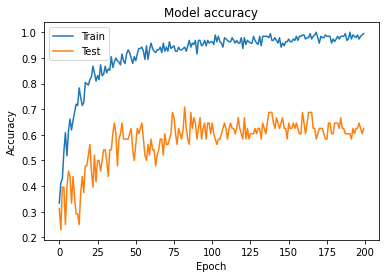

In [4]:
from models import *
init()
model = make_cnn_model(subject_1_trials[3], subject_1_trials[4],
                       subject_1_trials[0], subject_1_trials[1], epochs=200)

In [5]:
test_scores = model.evaluate(all_trials[0].transpose(0, 2, 1)[:, :, :, None], all_trials[1] - 769)
print('Subject 1 Train to Overall Test Loss:', test_scores[0])
print('Subject 1 Train to Overall Test Acc:', test_scores[1])

443/443 [==============================] - 0s 627us/sample - loss: 4.6842 - accuracy: 0.4018
Subject 1 Train to Overall Test Loss: 4.68417809187155
Subject 1 Train to Overall Test Acc: 0.40180588


Consider on all test subjects, no augmentation

1 Physical GPUs, 1 Logical GPUs
Train on 1692 samples, validate on 423 samples
Epoch 1/200
1692/1692 [==============================] - 2s 1ms/sample - loss: 2.0782 - accuracy: 0.2807 - val_loss: 1.4166 - val_accuracy: 0.2600
Epoch 2/200
1692/1692 [==============================] - 1s 635us/sample - loss: 1.8196 - accuracy: 0.3712 - val_loss: 1.4006 - val_accuracy: 0.3546
Epoch 3/200
1692/1692 [==============================] - 1s 609us/sample - loss: 1.6385 - accuracy: 0.4007 - val_loss: 1.3556 - val_accuracy: 0.3830
Epoch 4/200
1692/1692 [==============================] - 1s 596us/sample - loss: 1.5371 - accuracy: 0.4285 - val_loss: 1.2656 - val_accuracy: 0.4326
Epoch 5/200
1692/1692 [==============================] - 1s 591us/sample - loss: 1.4438 - accuracy: 0.4379 - val_loss: 1.2158 - val_accuracy: 0.4775
Epoch 6/200
1692/1692 [==============================] - 1s 601us/sample - loss: 1.3974 - accuracy: 0.4651 - val_loss: 1.2042 - val_accuracy: 0.4728
Epoch 7/200
1692/1692 [======

1692/1692 [==============================] - 1s 828us/sample - loss: 0.7418 - accuracy: 0.7134 - val_loss: 0.9915 - val_accuracy: 0.6288
Epoch 56/200
1692/1692 [==============================] - 1s 595us/sample - loss: 0.7374 - accuracy: 0.7299 - val_loss: 0.9841 - val_accuracy: 0.6147
Epoch 57/200
1692/1692 [==============================] - 1s 638us/sample - loss: 0.7675 - accuracy: 0.7039 - val_loss: 0.9907 - val_accuracy: 0.6265
Epoch 58/200
1692/1692 [==============================] - 1s 641us/sample - loss: 0.7478 - accuracy: 0.7163 - val_loss: 1.0097 - val_accuracy: 0.6147
Epoch 59/200
1692/1692 [==============================] - 1s 597us/sample - loss: 0.7551 - accuracy: 0.7039 - val_loss: 0.9834 - val_accuracy: 0.6123
Epoch 60/200
1692/1692 [==============================] - 1s 684us/sample - loss: 0.7540 - accuracy: 0.7063 - val_loss: 0.9890 - val_accuracy: 0.6336
Epoch 61/200
1692/1692 [==============================] - 1s 766us/sample - loss: 0.7665 - accuracy: 0.7193 - val

1692/1692 [==============================] - 1s 639us/sample - loss: 0.6327 - accuracy: 0.7671 - val_loss: 1.0495 - val_accuracy: 0.6359
Epoch 110/200
1692/1692 [==============================] - 1s 605us/sample - loss: 0.5917 - accuracy: 0.7866 - val_loss: 1.0067 - val_accuracy: 0.6501
Epoch 111/200
1692/1692 [==============================] - 1s 667us/sample - loss: 0.6066 - accuracy: 0.7861 - val_loss: 0.9296 - val_accuracy: 0.6714
Epoch 112/200
1692/1692 [==============================] - 1s 637us/sample - loss: 0.5743 - accuracy: 0.7961 - val_loss: 0.9751 - val_accuracy: 0.6572
Epoch 113/200
1692/1692 [==============================] - 1s 666us/sample - loss: 0.5878 - accuracy: 0.7831 - val_loss: 0.9744 - val_accuracy: 0.6478
Epoch 114/200
1692/1692 [==============================] - 1s 788us/sample - loss: 0.5934 - accuracy: 0.7996 - val_loss: 0.9899 - val_accuracy: 0.6525
Epoch 115/200
1692/1692 [==============================] - 1s 745us/sample - loss: 0.5881 - accuracy: 0.7884

1692/1692 [==============================] - 1s 672us/sample - loss: 0.4833 - accuracy: 0.8221 - val_loss: 0.9065 - val_accuracy: 0.6998
Epoch 164/200
1692/1692 [==============================] - 1s 735us/sample - loss: 0.4958 - accuracy: 0.8262 - val_loss: 0.9395 - val_accuracy: 0.6903
Epoch 165/200
1692/1692 [==============================] - 1s 669us/sample - loss: 0.4895 - accuracy: 0.8304 - val_loss: 0.9518 - val_accuracy: 0.6809
Epoch 166/200
1692/1692 [==============================] - 1s 675us/sample - loss: 0.4630 - accuracy: 0.8351 - val_loss: 0.9698 - val_accuracy: 0.6690
Epoch 167/200
1692/1692 [==============================] - 1s 746us/sample - loss: 0.4721 - accuracy: 0.8280 - val_loss: 0.9480 - val_accuracy: 0.6761
Epoch 168/200
1692/1692 [==============================] - 1s 701us/sample - loss: 0.4649 - accuracy: 0.8369 - val_loss: 0.9150 - val_accuracy: 0.6998
Epoch 169/200
1692/1692 [==============================] - 1s 695us/sample - loss: 0.4874 - accuracy: 0.8316

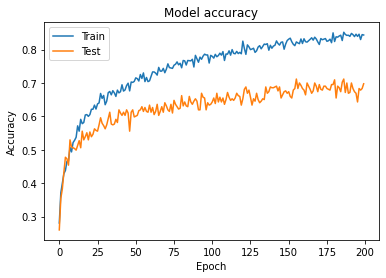

In [7]:
from models import *
init()
model = make_cnn_model(all_trials[3], all_trials[4], all_trials[0], all_trials[1], epochs=200)                       


1 Physical GPUs, 1 Logical GPUs
Train on 1692 samples, validate on 423 samples
Epoch 1/200
1692/1692 [==============================] - 3s 2ms/sample - loss: 1.8486 - accuracy: 0.3180 - val_loss: 1.4177 - val_accuracy: 0.3286
Epoch 2/200
1692/1692 [==============================] - 1s 610us/sample - loss: 1.7769 - accuracy: 0.3635 - val_loss: 1.4084 - val_accuracy: 0.3452
Epoch 3/200
1692/1692 [==============================] - 1s 601us/sample - loss: 1.6874 - accuracy: 0.3682 - val_loss: 1.3844 - val_accuracy: 0.4326
Epoch 4/200
1692/1692 [==============================] - 1s 597us/sample - loss: 1.6024 - accuracy: 0.3836 - val_loss: 1.3062 - val_accuracy: 0.4657
Epoch 5/200
1692/1692 [==============================] - 1s 611us/sample - loss: 1.5738 - accuracy: 0.4214 - val_loss: 1.2632 - val_accuracy: 0.4303
Epoch 6/200
1692/1692 [==============================] - 1s 607us/sample - loss: 1.5042 - accuracy: 0.4285 - val_loss: 1.2761 - val_accuracy: 0.4397
Epoch 7/200
1692/1692 [======

1692/1692 [==============================] - 1s 658us/sample - loss: 0.7388 - accuracy: 0.7234 - val_loss: 1.0617 - val_accuracy: 0.6241
Epoch 56/200
1692/1692 [==============================] - 1s 627us/sample - loss: 0.7125 - accuracy: 0.7358 - val_loss: 1.0153 - val_accuracy: 0.6288
Epoch 57/200
1692/1692 [==============================] - 1s 663us/sample - loss: 0.7183 - accuracy: 0.7281 - val_loss: 1.0258 - val_accuracy: 0.6241
Epoch 58/200
1692/1692 [==============================] - 1s 609us/sample - loss: 0.7237 - accuracy: 0.7311 - val_loss: 1.0590 - val_accuracy: 0.6454
Epoch 59/200
1692/1692 [==============================] - 1s 615us/sample - loss: 0.7310 - accuracy: 0.7299 - val_loss: 1.0075 - val_accuracy: 0.6407
Epoch 60/200
1692/1692 [==============================] - 1s 601us/sample - loss: 0.6838 - accuracy: 0.7500 - val_loss: 1.0738 - val_accuracy: 0.6147
Epoch 61/200
1692/1692 [==============================] - 1s 594us/sample - loss: 0.7193 - accuracy: 0.7388 - val

1692/1692 [==============================] - 1s 619us/sample - loss: 0.5349 - accuracy: 0.8168 - val_loss: 1.1763 - val_accuracy: 0.6336
Epoch 110/200
1692/1692 [==============================] - 1s 731us/sample - loss: 0.5160 - accuracy: 0.8310 - val_loss: 1.1512 - val_accuracy: 0.6312
Epoch 111/200
1692/1692 [==============================] - 1s 645us/sample - loss: 0.5143 - accuracy: 0.8268 - val_loss: 1.1004 - val_accuracy: 0.6809
Epoch 112/200
1692/1692 [==============================] - 1s 643us/sample - loss: 0.5118 - accuracy: 0.8298 - val_loss: 1.1205 - val_accuracy: 0.6454
Epoch 113/200
1692/1692 [==============================] - 1s 641us/sample - loss: 0.5249 - accuracy: 0.8115 - val_loss: 1.1040 - val_accuracy: 0.6548
Epoch 114/200
1692/1692 [==============================] - 1s 593us/sample - loss: 0.5150 - accuracy: 0.8132 - val_loss: 1.1334 - val_accuracy: 0.6548
Epoch 115/200
1692/1692 [==============================] - 1s 724us/sample - loss: 0.5127 - accuracy: 0.8304

1692/1692 [==============================] - 1s 737us/sample - loss: 0.4217 - accuracy: 0.8605 - val_loss: 1.1023 - val_accuracy: 0.6809
Epoch 164/200
1692/1692 [==============================] - 1s 735us/sample - loss: 0.4378 - accuracy: 0.8546 - val_loss: 1.2003 - val_accuracy: 0.6548
Epoch 165/200
1692/1692 [==============================] - 1s 790us/sample - loss: 0.4291 - accuracy: 0.8688 - val_loss: 1.1980 - val_accuracy: 0.6525
Epoch 166/200
1692/1692 [==============================] - 1s 779us/sample - loss: 0.4094 - accuracy: 0.8629 - val_loss: 1.2133 - val_accuracy: 0.6619
Epoch 167/200
1692/1692 [==============================] - 1s 677us/sample - loss: 0.4293 - accuracy: 0.8593 - val_loss: 1.1795 - val_accuracy: 0.6643
Epoch 168/200
1692/1692 [==============================] - 1s 630us/sample - loss: 0.4020 - accuracy: 0.8741 - val_loss: 1.1861 - val_accuracy: 0.6832
Epoch 169/200
1692/1692 [==============================] - 1s 818us/sample - loss: 0.4019 - accuracy: 0.8794

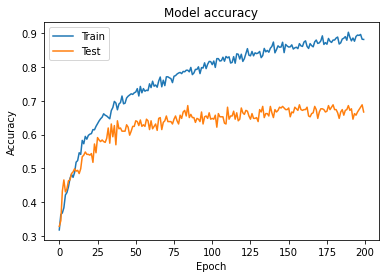

In [3]:
from models import *
init()
model = make_cnn_model(all_trials[3], all_trials[4], all_trials[0], all_trials[1],
                       learning_rate=0.0001, epochs=200, optim='RMSprop')                       


1 Physical GPUs, 1 Logical GPUs
Train on 3384 samples, validate on 846 samples
Epoch 1/500
3384/3384 [==============================] - 3s 989us/sample - loss: 1.6468 - accuracy: 0.3496 - val_loss: 1.4439 - val_accuracy: 0.3180
Epoch 2/500
3384/3384 [==============================] - 2s 483us/sample - loss: 1.5159 - accuracy: 0.3898 - val_loss: 1.3715 - val_accuracy: 0.4740
Epoch 3/500
3384/3384 [==============================] - 1s 387us/sample - loss: 1.4256 - accuracy: 0.4193 - val_loss: 1.1728 - val_accuracy: 0.5366
Epoch 4/500
3384/3384 [==============================] - 1s 415us/sample - loss: 1.3769 - accuracy: 0.4515 - val_loss: 1.0998 - val_accuracy: 0.5437
Epoch 5/500
3384/3384 [==============================] - 2s 464us/sample - loss: 1.3323 - accuracy: 0.4625 - val_loss: 1.0510 - val_accuracy: 0.5674
Epoch 6/500
3384/3384 [==============================] - 1s 376us/sample - loss: 1.2850 - accuracy: 0.4908 - val_loss: 1.0002 - val_accuracy: 0.6099
Epoch 7/500
3384/3384 [====

3384/3384 [==============================] - 1s 442us/sample - loss: 0.7842 - accuracy: 0.7148 - val_loss: 0.6031 - val_accuracy: 0.8109
Epoch 56/500
3384/3384 [==============================] - 1s 382us/sample - loss: 0.7964 - accuracy: 0.7116 - val_loss: 0.5972 - val_accuracy: 0.8026
Epoch 57/500
3384/3384 [==============================] - 1s 411us/sample - loss: 0.7987 - accuracy: 0.7210 - val_loss: 0.5991 - val_accuracy: 0.8014
Epoch 58/500
3384/3384 [==============================] - 2s 469us/sample - loss: 0.7720 - accuracy: 0.7207 - val_loss: 0.5967 - val_accuracy: 0.7979
Epoch 59/500
3384/3384 [==============================] - 1s 398us/sample - loss: 0.7666 - accuracy: 0.7231 - val_loss: 0.5923 - val_accuracy: 0.7955
Epoch 60/500
3384/3384 [==============================] - 1s 426us/sample - loss: 0.7802 - accuracy: 0.7193 - val_loss: 0.5842 - val_accuracy: 0.8156
Epoch 61/500
3384/3384 [==============================] - 1s 376us/sample - loss: 0.7681 - accuracy: 0.7255 - val

3384/3384 [==============================] - 1s 364us/sample - loss: 0.6475 - accuracy: 0.7742 - val_loss: 0.4614 - val_accuracy: 0.8487
Epoch 110/500
3384/3384 [==============================] - 1s 364us/sample - loss: 0.6316 - accuracy: 0.7837 - val_loss: 0.4633 - val_accuracy: 0.8534
Epoch 111/500
3384/3384 [==============================] - 1s 410us/sample - loss: 0.6314 - accuracy: 0.7748 - val_loss: 0.4713 - val_accuracy: 0.8546
Epoch 112/500
3384/3384 [==============================] - 1s 380us/sample - loss: 0.6401 - accuracy: 0.7790 - val_loss: 0.4557 - val_accuracy: 0.8570
Epoch 113/500
3384/3384 [==============================] - 1s 384us/sample - loss: 0.6271 - accuracy: 0.7813 - val_loss: 0.4413 - val_accuracy: 0.8629
Epoch 114/500
3384/3384 [==============================] - 1s 379us/sample - loss: 0.6127 - accuracy: 0.7858 - val_loss: 0.4573 - val_accuracy: 0.8700
Epoch 115/500
3384/3384 [==============================] - 1s 377us/sample - loss: 0.6345 - accuracy: 0.7775

3384/3384 [==============================] - 2s 496us/sample - loss: 0.5495 - accuracy: 0.8135 - val_loss: 0.3760 - val_accuracy: 0.8972
Epoch 164/500
3384/3384 [==============================] - 2s 515us/sample - loss: 0.5560 - accuracy: 0.8168 - val_loss: 0.3788 - val_accuracy: 0.8853
Epoch 165/500
3384/3384 [==============================] - 2s 570us/sample - loss: 0.5590 - accuracy: 0.8141 - val_loss: 0.3689 - val_accuracy: 0.8842
Epoch 166/500
3384/3384 [==============================] - 1s 420us/sample - loss: 0.5400 - accuracy: 0.8186 - val_loss: 0.3723 - val_accuracy: 0.8865
Epoch 167/500
3384/3384 [==============================] - 2s 456us/sample - loss: 0.5522 - accuracy: 0.8135 - val_loss: 0.3706 - val_accuracy: 0.9007
Epoch 168/500
3384/3384 [==============================] - 1s 379us/sample - loss: 0.5201 - accuracy: 0.8206 - val_loss: 0.3678 - val_accuracy: 0.8924
Epoch 169/500
3384/3384 [==============================] - 2s 490us/sample - loss: 0.5354 - accuracy: 0.8236

3384/3384 [==============================] - 2s 528us/sample - loss: 0.4891 - accuracy: 0.8333 - val_loss: 0.3132 - val_accuracy: 0.9113
Epoch 218/500
3384/3384 [==============================] - 1s 401us/sample - loss: 0.4877 - accuracy: 0.8410 - val_loss: 0.3179 - val_accuracy: 0.9090
Epoch 219/500
3384/3384 [==============================] - 1s 416us/sample - loss: 0.4998 - accuracy: 0.8410 - val_loss: 0.3132 - val_accuracy: 0.9090
Epoch 220/500
3384/3384 [==============================] - 1s 411us/sample - loss: 0.4923 - accuracy: 0.8392 - val_loss: 0.3118 - val_accuracy: 0.9113
Epoch 221/500
3384/3384 [==============================] - 1s 422us/sample - loss: 0.4820 - accuracy: 0.8389 - val_loss: 0.3097 - val_accuracy: 0.9173
Epoch 222/500
3384/3384 [==============================] - 1s 419us/sample - loss: 0.4742 - accuracy: 0.8446 - val_loss: 0.3106 - val_accuracy: 0.9173
Epoch 223/500
3384/3384 [==============================] - 2s 550us/sample - loss: 0.4742 - accuracy: 0.8437

3384/3384 [==============================] - 2s 477us/sample - loss: 0.4468 - accuracy: 0.8537 - val_loss: 0.2849 - val_accuracy: 0.9232
Epoch 272/500
3384/3384 [==============================] - 1s 416us/sample - loss: 0.4133 - accuracy: 0.8709 - val_loss: 0.2808 - val_accuracy: 0.9232
Epoch 273/500
3384/3384 [==============================] - 2s 454us/sample - loss: 0.4401 - accuracy: 0.8534 - val_loss: 0.2811 - val_accuracy: 0.9232
Epoch 274/500
3384/3384 [==============================] - 2s 500us/sample - loss: 0.4394 - accuracy: 0.8537 - val_loss: 0.2748 - val_accuracy: 0.9255
Epoch 275/500
3384/3384 [==============================] - 1s 401us/sample - loss: 0.4759 - accuracy: 0.8449 - val_loss: 0.2764 - val_accuracy: 0.9279
Epoch 276/500
3384/3384 [==============================] - 1s 403us/sample - loss: 0.4449 - accuracy: 0.8576 - val_loss: 0.2773 - val_accuracy: 0.9267
Epoch 277/500
3384/3384 [==============================] - 2s 498us/sample - loss: 0.4243 - accuracy: 0.8685

3384/3384 [==============================] - 2s 458us/sample - loss: 0.4001 - accuracy: 0.8780 - val_loss: 0.2504 - val_accuracy: 0.9338
Epoch 326/500
3384/3384 [==============================] - 1s 427us/sample - loss: 0.4037 - accuracy: 0.8738 - val_loss: 0.2440 - val_accuracy: 0.9385
Epoch 327/500
3384/3384 [==============================] - 1s 433us/sample - loss: 0.4197 - accuracy: 0.8735 - val_loss: 0.2393 - val_accuracy: 0.9374
Epoch 328/500
3384/3384 [==============================] - 2s 449us/sample - loss: 0.4041 - accuracy: 0.8682 - val_loss: 0.2418 - val_accuracy: 0.9397
Epoch 329/500
3384/3384 [==============================] - 1s 391us/sample - loss: 0.4070 - accuracy: 0.8753 - val_loss: 0.2531 - val_accuracy: 0.9374
Epoch 330/500
3384/3384 [==============================] - 2s 481us/sample - loss: 0.4079 - accuracy: 0.8729 - val_loss: 0.2458 - val_accuracy: 0.9362
Epoch 331/500
3384/3384 [==============================] - 2s 479us/sample - loss: 0.3888 - accuracy: 0.8833

3384/3384 [==============================] - 1s 372us/sample - loss: 0.3662 - accuracy: 0.8845 - val_loss: 0.2208 - val_accuracy: 0.9492
Epoch 380/500
3384/3384 [==============================] - 1s 396us/sample - loss: 0.3696 - accuracy: 0.8889 - val_loss: 0.2202 - val_accuracy: 0.9492
Epoch 381/500
3384/3384 [==============================] - 2s 451us/sample - loss: 0.3725 - accuracy: 0.8871 - val_loss: 0.2188 - val_accuracy: 0.9456
Epoch 382/500
3384/3384 [==============================] - 1s 390us/sample - loss: 0.3896 - accuracy: 0.8794 - val_loss: 0.2143 - val_accuracy: 0.9492
Epoch 383/500
3384/3384 [==============================] - 2s 477us/sample - loss: 0.3826 - accuracy: 0.8853 - val_loss: 0.2181 - val_accuracy: 0.9492
Epoch 384/500
3384/3384 [==============================] - 2s 447us/sample - loss: 0.3789 - accuracy: 0.8865 - val_loss: 0.2131 - val_accuracy: 0.9480
Epoch 385/500
3384/3384 [==============================] - 1s 396us/sample - loss: 0.3877 - accuracy: 0.8809

3384/3384 [==============================] - 2s 449us/sample - loss: 0.3582 - accuracy: 0.8930 - val_loss: 0.2097 - val_accuracy: 0.9527
Epoch 434/500
3384/3384 [==============================] - 1s 395us/sample - loss: 0.3495 - accuracy: 0.8966 - val_loss: 0.2070 - val_accuracy: 0.9504
Epoch 435/500
3384/3384 [==============================] - 1s 425us/sample - loss: 0.3511 - accuracy: 0.8957 - val_loss: 0.2030 - val_accuracy: 0.9574
Epoch 436/500
3384/3384 [==============================] - 2s 491us/sample - loss: 0.3584 - accuracy: 0.8907 - val_loss: 0.2087 - val_accuracy: 0.9527
Epoch 437/500
3384/3384 [==============================] - 1s 403us/sample - loss: 0.3473 - accuracy: 0.8945 - val_loss: 0.2003 - val_accuracy: 0.9574
Epoch 438/500
3384/3384 [==============================] - 2s 523us/sample - loss: 0.3508 - accuracy: 0.8951 - val_loss: 0.1985 - val_accuracy: 0.9598
Epoch 439/500
3384/3384 [==============================] - 2s 524us/sample - loss: 0.3880 - accuracy: 0.8774

3384/3384 [==============================] - 1s 383us/sample - loss: 0.3326 - accuracy: 0.9022 - val_loss: 0.1903 - val_accuracy: 0.9586
Epoch 488/500
3384/3384 [==============================] - 2s 493us/sample - loss: 0.3424 - accuracy: 0.8980 - val_loss: 0.1912 - val_accuracy: 0.9563
Epoch 489/500
3384/3384 [==============================] - 2s 496us/sample - loss: 0.3318 - accuracy: 0.8992 - val_loss: 0.1929 - val_accuracy: 0.9563
Epoch 490/500
3384/3384 [==============================] - 2s 537us/sample - loss: 0.3445 - accuracy: 0.8945 - val_loss: 0.1951 - val_accuracy: 0.9563
Epoch 491/500
3384/3384 [==============================] - 1s 423us/sample - loss: 0.3382 - accuracy: 0.8986 - val_loss: 0.1889 - val_accuracy: 0.9610
Epoch 492/500
3384/3384 [==============================] - 1s 428us/sample - loss: 0.3406 - accuracy: 0.8995 - val_loss: 0.1939 - val_accuracy: 0.9574
Epoch 493/500
3384/3384 [==============================] - 1s 429us/sample - loss: 0.3457 - accuracy: 0.8954

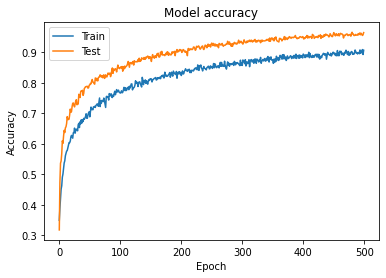

In [3]:
from models import *
init()
model = make_cnn_model(augmented_trials_x, augmented_trials_y, augmented_test_x, augmented_test_y,
                       reg=0.002, dropout=0.4, learning_rate=0.0001, alpha=0.75, epochs=500)                       


1 Physical GPUs, 1 Logical GPUs
Train on 3384 samples, validate on 846 samples
Epoch 1/300
3384/3384 [==============================] - 4s 1ms/sample - loss: 1.8974 - accuracy: 0.3259 - val_loss: 1.4915 - val_accuracy: 0.3333
Epoch 2/300
3384/3384 [==============================] - 2s 444us/sample - loss: 1.6367 - accuracy: 0.3833 - val_loss: 1.3850 - val_accuracy: 0.4693
Epoch 3/300
3384/3384 [==============================] - 2s 459us/sample - loss: 1.4789 - accuracy: 0.4258 - val_loss: 1.2247 - val_accuracy: 0.5095
Epoch 4/300
3384/3384 [==============================] - 2s 501us/sample - loss: 1.4195 - accuracy: 0.4486 - val_loss: 1.1438 - val_accuracy: 0.5508
Epoch 5/300
3384/3384 [==============================] - 1s 426us/sample - loss: 1.3410 - accuracy: 0.4861 - val_loss: 1.0668 - val_accuracy: 0.5969
Epoch 6/300
3384/3384 [==============================] - 2s 454us/sample - loss: 1.2998 - accuracy: 0.5024 - val_loss: 1.0199 - val_accuracy: 0.6489
Epoch 7/300
3384/3384 [======

3384/3384 [==============================] - 2s 456us/sample - loss: 0.7790 - accuracy: 0.7423 - val_loss: 0.5975 - val_accuracy: 0.8121
Epoch 56/300
3384/3384 [==============================] - 2s 450us/sample - loss: 0.7660 - accuracy: 0.7465 - val_loss: 0.5963 - val_accuracy: 0.8121
Epoch 57/300
3384/3384 [==============================] - 2s 572us/sample - loss: 0.7846 - accuracy: 0.7337 - val_loss: 0.5715 - val_accuracy: 0.8191
Epoch 58/300
3384/3384 [==============================] - 2s 460us/sample - loss: 0.7557 - accuracy: 0.7394 - val_loss: 0.5702 - val_accuracy: 0.8251
Epoch 59/300
3384/3384 [==============================] - 2s 474us/sample - loss: 0.7657 - accuracy: 0.7423 - val_loss: 0.5698 - val_accuracy: 0.8298
Epoch 60/300
3384/3384 [==============================] - 2s 500us/sample - loss: 0.7514 - accuracy: 0.7494 - val_loss: 0.5757 - val_accuracy: 0.8156
Epoch 61/300
3384/3384 [==============================] - 2s 446us/sample - loss: 0.7380 - accuracy: 0.7494 - val

3384/3384 [==============================] - 2s 483us/sample - loss: 0.6105 - accuracy: 0.8082 - val_loss: 0.4453 - val_accuracy: 0.8747
Epoch 110/300
3384/3384 [==============================] - 1s 428us/sample - loss: 0.6326 - accuracy: 0.8017 - val_loss: 0.4276 - val_accuracy: 0.8865
Epoch 111/300
3384/3384 [==============================] - 1s 414us/sample - loss: 0.6078 - accuracy: 0.8017 - val_loss: 0.4374 - val_accuracy: 0.8723
Epoch 112/300
3384/3384 [==============================] - 1s 427us/sample - loss: 0.6033 - accuracy: 0.8103 - val_loss: 0.4284 - val_accuracy: 0.8806
Epoch 113/300
3384/3384 [==============================] - 2s 605us/sample - loss: 0.5979 - accuracy: 0.8112 - val_loss: 0.4260 - val_accuracy: 0.8830
Epoch 114/300
3384/3384 [==============================] - 2s 595us/sample - loss: 0.6064 - accuracy: 0.8094 - val_loss: 0.4239 - val_accuracy: 0.8700
Epoch 115/300
3384/3384 [==============================] - 2s 456us/sample - loss: 0.6084 - accuracy: 0.8061

3384/3384 [==============================] - 1s 441us/sample - loss: 0.5287 - accuracy: 0.8419 - val_loss: 0.3472 - val_accuracy: 0.9149
Epoch 164/300
3384/3384 [==============================] - 2s 472us/sample - loss: 0.5120 - accuracy: 0.8437 - val_loss: 0.3603 - val_accuracy: 0.9090
Epoch 165/300
3384/3384 [==============================] - 2s 534us/sample - loss: 0.5144 - accuracy: 0.8466 - val_loss: 0.3529 - val_accuracy: 0.9031
Epoch 166/300
3384/3384 [==============================] - 1s 427us/sample - loss: 0.5175 - accuracy: 0.8487 - val_loss: 0.3461 - val_accuracy: 0.9208
Epoch 167/300
3384/3384 [==============================] - 1s 443us/sample - loss: 0.5042 - accuracy: 0.8517 - val_loss: 0.3536 - val_accuracy: 0.9161
Epoch 168/300
3384/3384 [==============================] - 2s 521us/sample - loss: 0.5037 - accuracy: 0.8505 - val_loss: 0.3432 - val_accuracy: 0.9196
Epoch 169/300
3384/3384 [==============================] - 2s 514us/sample - loss: 0.5013 - accuracy: 0.8582

3384/3384 [==============================] - 2s 491us/sample - loss: 0.4551 - accuracy: 0.8661 - val_loss: 0.3127 - val_accuracy: 0.9255
Epoch 218/300
3384/3384 [==============================] - 2s 460us/sample - loss: 0.4596 - accuracy: 0.8644 - val_loss: 0.2956 - val_accuracy: 0.9326
Epoch 219/300
3384/3384 [==============================] - 2s 473us/sample - loss: 0.4720 - accuracy: 0.8623 - val_loss: 0.2951 - val_accuracy: 0.9444
Epoch 220/300
3384/3384 [==============================] - 1s 431us/sample - loss: 0.4444 - accuracy: 0.8738 - val_loss: 0.2999 - val_accuracy: 0.9421
Epoch 221/300
3384/3384 [==============================] - 1s 429us/sample - loss: 0.4480 - accuracy: 0.8756 - val_loss: 0.2861 - val_accuracy: 0.9421
Epoch 222/300
3384/3384 [==============================] - 2s 477us/sample - loss: 0.4611 - accuracy: 0.8655 - val_loss: 0.2875 - val_accuracy: 0.9385
Epoch 223/300
3384/3384 [==============================] - 1s 438us/sample - loss: 0.4661 - accuracy: 0.8682

3384/3384 [==============================] - 1s 422us/sample - loss: 0.4094 - accuracy: 0.8880 - val_loss: 0.2545 - val_accuracy: 0.9586
Epoch 272/300
3384/3384 [==============================] - 2s 670us/sample - loss: 0.4165 - accuracy: 0.8824 - val_loss: 0.2677 - val_accuracy: 0.9456
Epoch 273/300
3384/3384 [==============================] - 2s 463us/sample - loss: 0.4067 - accuracy: 0.8915 - val_loss: 0.2552 - val_accuracy: 0.9622
Epoch 274/300
3384/3384 [==============================] - 2s 461us/sample - loss: 0.4117 - accuracy: 0.8895 - val_loss: 0.2551 - val_accuracy: 0.9598
Epoch 275/300
3384/3384 [==============================] - 2s 449us/sample - loss: 0.4054 - accuracy: 0.8910 - val_loss: 0.2484 - val_accuracy: 0.9574
Epoch 276/300
3384/3384 [==============================] - 2s 455us/sample - loss: 0.3971 - accuracy: 0.8978 - val_loss: 0.2493 - val_accuracy: 0.9586
Epoch 277/300
3384/3384 [==============================] - 2s 467us/sample - loss: 0.3979 - accuracy: 0.8960

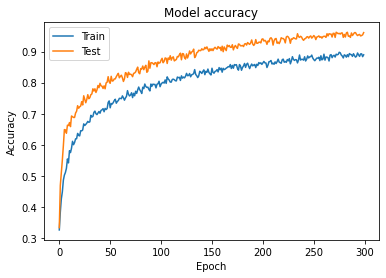

In [3]:
from models import *
init()
model = make_cnn_model(augmented_trials_x, augmented_trials_y, augmented_test_x, augmented_test_y,
                       reg=0.003, dropout=0.45, learning_rate=0.0001, alpha=0.75, epochs=300, relative_size=1.2)
#optimizer = keras.optimizer.Adam(learning_rate=0.0001, beta_1=0.85, beta_2=.92, amsgrad=True)